<a href=https://uplimit.com/course/r-for-data-science>
  <img src=https://imgur.com/6Vkc11w.png />
</a>

|        |                                   |                                   |                                 |                                |
| -------| ----------------------------------| -------------------------------- -| --------------------------------| ------------------------------------------|
| Week 1 | [[01] Doing Data Science](https://colab.research.google.com/drive/1aWpmzS36qVc8hNIaSSSHexlodwwyMJCB)           | [[02] Data Science in Action](https://colab.research.google.com/drive/1aWpmzS36qVc8hNIaSSSHexlodwwyMJCB)       | [[03] Importing Data](https://colab.research.google.com/drive/13kHBX3H1F2yx5yXWJ5iFZh48qjEtpLjU)             | [[04] Visualizing Data: Overview](https://colab.research.google.com/drive/1JSeDt-Gneegd5B2KwWTJF_igYPb-xsIv)          |
|        | [[05] Transforming Data: Overview](https://colab.research.google.com/drive/1IMZJFE8WmwjgdYCddvaO386PljKq_PjC)  | [[06] Transforming Data: Manipulate](https://colab.research.google.com/drive/19ClnAH7d30I9PkD9KuZndPmy5hxk3gdi) |                                 |                                           |
| Week 2 | [[07] Transforming Data: Aggregate](https://colab.research.google.com/drive/1zigvePewKpzKQHx2pjABXU6Ms8QzQXj7) | [[08] Transforming Data: Reshape](https://colab.research.google.com/drive/1Ma9VrM9SrkNEeXTSul0Ca8a7GHAeNLzC)   | [[09] Transforming Data: Combine](https://colab.research.google.com/drive/1JUGm1h4YPmCkre-rVUj5Ql7lBS66_xIs) | [[10] Visualizing Data: Grammar of Graphics](https://colab.research.google.com/drive/1YLE3NPp-TO2KUTohtidjzKMeqJVWxYoT) |
|        | [[11] Data Science in Action Again](https://colab.research.google.com/drive/1eWjVK4oEiXdwdP4sT0nOJlmkCMBkfLpz) |                                   |                                 |                                           |
Books | [Hands on Programming with R](https://rstudio-education.github.io/hopr/index.html) | [R for Data Science](https://r4ds.hadley.nz/) | [Elegant Graphics for Data Analysis](https://ggplot2-book.org/)



> 📕 __BEFORE YOU GET STARTED:__
> 1. Click on **Copy to Drive** to copy notebook to your drive.
> 2. Click on **Share** on the top-right corner (of your copied notebook).
> 3. Update sharing settings to **Anyone with link**
> 4. Delete this cell.


## Visualizing Data

Data visualization is a powerful tool in the field of data science that helps to communicate complex data insights in an intuitive and easy-to-understand way. R is a popular programming language and environment for statistical computing and graphics that provides a wide range of tools and packages for creating high-quality visualizations.

<img src="https://i.imgur.com/X960Ag4.png" />

R offers several different approaches to data visualization, each with its own strengths and weaknesses. Here are some of the most common approaches:

__Base:__ R's base graphics system is built-in and provides basic functionality for creating a range of plots, including scatterplots, line charts, and histograms. While it's easy to use and flexible, it lacks some of the advanced features of more modern graphics packages.

__Lattice:__ Lattice is another popular data visualization package that provides a high-level interface for creating complex plots. It's particularly useful for creating trellis plots, which allow users to visualize relationships between multiple variables at once.

__ggplot2:__ ggplot2 is a popular data visualization package that provides a more powerful and flexible approach to data visualization than base graphics. ggplot2 uses a "grammar of graphics" approach, allowing users to build plots by adding layers of graphical elements, such as points, lines, and labels. This makes it easy to create complex visualizations.

In this course, we will focus on `ggplot2`, as it provides us with a highly systematic grammar to create complex visualizations in a flexible manner.


In [ ]:
# Load packages and common utility scripts
library(tidyverse)
url = "https://gist.githubusercontent.com/ramnathv/e71d3ffe88961fc4ef95642053012384/raw/9dda53562d06009912841ab3538d4aeb90e5ee09/_common.R"
download.file(url, basename(url))
source("_common.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Tracing function "install.packages" in package "utils"

Tracing function "update.packages" in package "utils"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inspecting installed packages...



### Tidy Data - Diamonds

The journey of every visualization begins with tidy data. We will use the `diamonds` dataset that ships with the `ggplot2` package to explore the amazing world of data visualization!

<img src="https://longs.nyc3.digitaloceanspaces.com/DiamondClarity-1.jpg?width=1024&name=DiamondClarity-1.jpg" width="100%" />

Let us start by printing the data to take a look at what it holds.

In [ ]:
# We filter out large diamonds so the plots look nicer!
diamonds <- diamonds |>
  filter(carat <= 3) |>
  slice_sample(prop = 0.2)

head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.35,Ideal,H,IF,60.7,56,1017,4.62,4.61,2.80
0.90,Premium,D,SI2,59.2,60,4114,6.34,6.30,3.74
1.05,Ideal,H,SI1,61.9,57,5342,6.54,6.57,4.06
1.12,Very Good,I,VS1,59.6,58,5036,6.82,6.77,4.05
0.43,Good,D,SI1,63.8,55,993,4.80,4.79,3.06
2.03,Premium,J,SI2,60.9,60,12078,8.21,8.10,4.97


The `diamonds` dataset is a table where each row represents a diamond, and each column characterizes a certain property of the diamond. For example, the very first row records a diamond that weighs 0.23 `carat`, has an Ideal `cut`, and SI2 `clarity`. This dataset is a good example of what we would call tidy data. A dataset is said to be tidy if it satisfies the following three conditions.

1. Every __row__ is an __observation__.
2. Every __column__ is a __variable__.
3. Every __cell__ is a __value__.

Note that a large part of the data science workflow is focused on transforming raw data into tidy data before it can be visualized and modeled. You will learn more about the grammar of data transformation later in this course.

Instead of printing some rows of the table, you can also use the `glimpse()` function to get a quick peek at the values in different columns along with their data types.

In [ ]:
glimpse(diamonds)

Rows: 10,781
Columns: 10
$ carat   <dbl> 0.35, 0.90, 1.05, 1.12, 0.43, 2.03, 1.01, 0.41, 0.41, 1.51, 0.…
$ cut     <ord> Ideal, Premium, Ideal, Very Good, Good, Premium, Good, Ideal, …
$ color   <ord> H, D, H, I, D, J, J, F, G, E, F, F, E, H, G, H, G, G, H, G, E,…
$ clarity <ord> IF, SI2, SI1, VS1, SI1, SI2, SI1, VS2, VS2, SI1, VS2, VS2, VS2…
$ depth   <dbl> 60.7, 59.2, 61.9, 59.6, 63.8, 60.9, 58.8, 62.7, 62.4, 61.8, 60…
$ table   <dbl> 56, 60, 57, 58, 55, 60, 57, 57, 55, 57, 59, 59, 54, 56, 60, 57…
$ price   <int> 1017, 4114, 5342, 5036, 993, 12078, 3853, 863, 827, 9474, 1294…
$ x       <dbl> 4.62, 6.34, 6.54, 6.82, 4.80, 8.21, 6.57, 4.73, 4.73, 7.36, 5.…
$ y       <dbl> 4.61, 6.30, 6.57, 6.77, 4.79, 8.10, 6.63, 4.78, 4.76, 7.43, 5.…
$ z       <dbl> 2.80, 3.74, 4.06, 4.05, 3.06, 4.97, 3.88, 2.98, 2.96, 4.57, 3.…


For more information about the `diamonds` dataset, please run `? diamonds` in your R console.

### Composing a Visualization

Unlike most other visualization packages, the `ggplot2` package does NOT provide a prebuilt set of chart types. Instead, it provides the basic building blocks and the tools to compose these elements together into a visualization. Let us take a tour of how to compose a visualization using `ggplot2` by replicating the visualization shown below.

In [ ]:
diamonds |>
  filter(carat <= 3) |>
  ggplot(aes(x = carat, y = price, color = clarity)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(
    x = "Carat",
    y = "Price (in USD)",
    color = "Clarity",
    title = "Diamonds: Price vs. Carat by Clarity",
    subtitle = "Price per carat of diamonds increases with clarity",
    caption = "Source: Diamonds Dataset"
  ) +
  theme(plot.title.position = "plot")

The core idea of visualizing data with `ggplot2` is to decompose your plot into its underlying layers. Accordingly, we can start with the raw canvas for the plot by calling the `ggplot()` function on the dataset. This returns a not-so-interesting empty plot, but trust me when I say that this is the start of the magic 🪄!

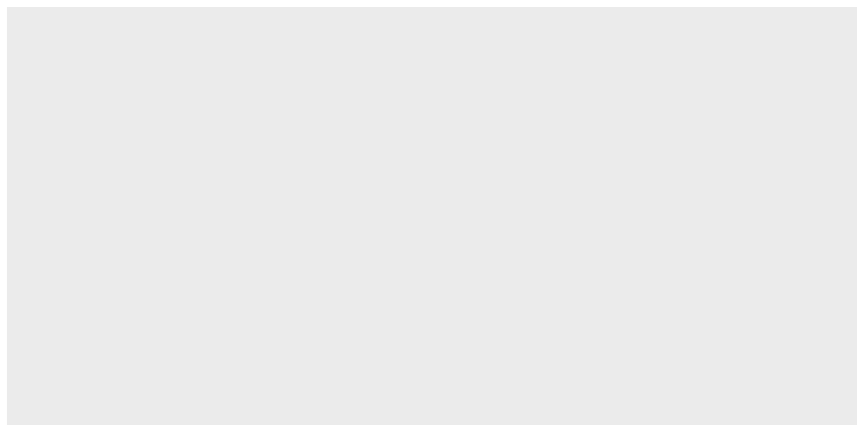

In [ ]:
diamonds |>
  ggplot()

The next visual element in the plot we will recreate are the __axes__. The x axis is mapped to the variable `carat`, while the y axis is mapped to the variable `price`. We can add this to the plot using the aesthetic function `aes()` and providing it with a mapping of the relevant axis to the variable in the dataset. While, we can pass multiple mappings to a single `aes()` call, we will keep it separate for now.


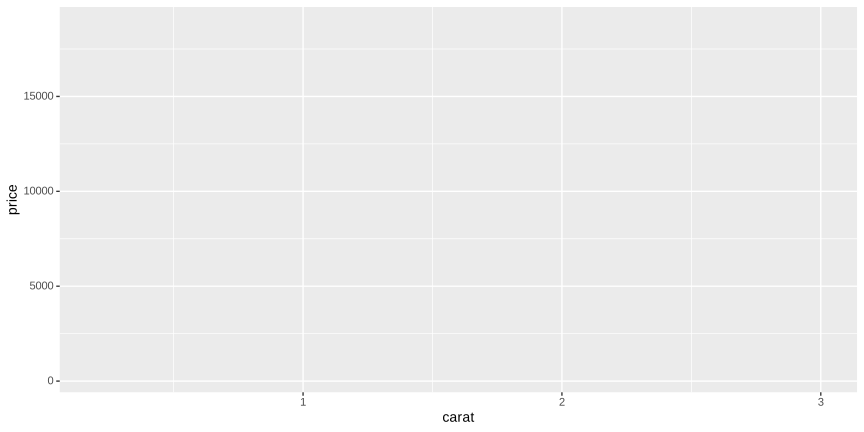

In [ ]:
diamonds |>
  ggplot() +
  aes(x = carat) +
  aes(y = price)

Note how we use the `+` operator rather than the pipe operator (`|>`) to build our plot. This is because the `ggplot2` package was released way before the pipe made its way into R. It is one of the few inconsistencies that exist in the `tidyverse` which otherwise prides itself on its amazing ability to be consistent all the way!

Now that we have mapped the axis, it is time to add more visual elements to the plot. The first element we see are the points on the plot. We can add visual elements to the plot using __geometries__. The `ggplot2()` package ships with several geometries out of the box. The one we need here is `geom_point()`.

In [ ]:
diamonds |>
  ggplot() +
  aes(x = carat) +
  aes(y = price) +
  geom_point()

We are making good progress here! We can now see the points on the plot. However, it does not quite look like the plot we set out to create. The points in our original plot were colored based on the `clarity` of the diamond. How do we incorporate this into our plot? Well, you might have guessed it correctly already. We just need to add an additional aesthetic mapping that maps the `color` aesthetic to the `clarity` variable.

In [ ]:
diamonds |>
  ggplot() +
  aes(x = carat) +
  aes(y = price) +
  aes(color = clarity) +
  geom_point()

That looks much better now! We are almost there. The next visual element we need to add are the lines. Each line is the line of best fit for a specific value of `clarity`. If I did not know `ggplot2`, the way I would have gone about adding this line to the plot is by building a regression model of `price` vs. `carat` for each value of `clarity` and then using the predicted values to get the line.

However, `ggplot2` make this really easy and has a geometry that is perfect for this use case. We can add the lines without doing any additional computation by using the `geom_smooth()` function, which fits a curve to the points. We specify `method = "lm"` to force it to fit a line. Note that we did not have to ask `geom_smooth()` to fit a separate line for each value of `clarity`. This is because the aesthetic mappings we added are global and every geometric layer that we add along the way will respect this mapping.

In [ ]:
diamonds |>
  ggplot() +
  aes(x = carat) +
  aes(y = price) +
  aes(color = clarity) +
  geom_point() +
  geom_smooth(method = "lm")

Finally, it is time to add labels to the plot. Labelling your plot correctly is very important to creating good visualizations. Once again, `ggplot2` makes it easy to add different labels using the `labs` function. Lo and behold, we have composed our first visualization using `ggplot2`.

In [ ]:
diamonds |>
  ggplot() +
  aes(x = carat) +
  aes(y = price) +
  aes(color = clarity) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Carat") +
  labs(y = "Price (in USD)") +
  labs(color = "Clarity") +
  labs(title = "Diamonds: Price vs. Carat by Clarity") +
  labs(subtitle = "Price per carat of diamonds increases with clarity") +
  labs(caption = "Source: Diamonds Dataset") +
  theme(plot.title.position = "plot")

You might be thinking that this syntax is quite verbose to create plots on a regular basis. And you wont be alone to think this way. Fortunately, `ggplot2` does let you combine multiple lines of this code to write this more concisely. It is customary in idiomatic ggplot2 code to pull the aesthetic mappings into the `ggplot()` call.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price, color = clarity)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(
    x = "Carat",
    y = "Price (in USD)",
    color = "Clarity",
    title = "Diamonds: Price vs. Carat by Clarity",
    subtitle = "Price per carat of diamonds increases with clarity",
    caption = "Source: Diamonds Dataset"
  ) +
  theme(plot.title.position = "plot")

Suppose, you wanted to add only ONE line of best fit to the plot rather than the multiple lines. How would you modify the code above to accomplish it?
The trick is to recognize that every geometric layer respects the aesthetic mappings that are global. If we want the points to be colored by `clarity`, but NOT the line, then all we need to do is to move the `color` mapping from the global layer into the geometry specific layer.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price)) +
  geom_point(aes(color = clarity)) +
  geom_smooth(method = "lm") +
  labs(
    x = "Carat",
    y = "Price (in USD)",
    color = "Clarity",
    title = "Diamonds: Price vs. Carat by Clarity",
    subtitle = "Price per carat of diamonds increases with clarity",
    caption = "Source: Diamonds Dataset"
  ) +
  theme(plot.title.position = "plot")

### Visualizing Variables

Let us explore how to use `ggplot2` to explore individual variables in a dataset. Our approach to visualize an individual variable will depend on whether it is numerical or categorical.

#### Numerical

A numerical variable is one that takes a wide range of values on the number scale. These variables can usually be added, subtracted, multiplied and divided. Additionally, they can be discrete or continuous. In the `diamonds` dataset, there are several numerical variables like `price`, `carat`, `x`, `y`, and `z`.

##### Histogram

The most common approach to visualizing a numerical variable is to create a histogram. A histogram consists of a series of vertical bars, where the height of each bar represents the frequency or count of data points that fall within a specific range or bin.

Let us create a histogram of the distribution of price per carat of diamonds.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


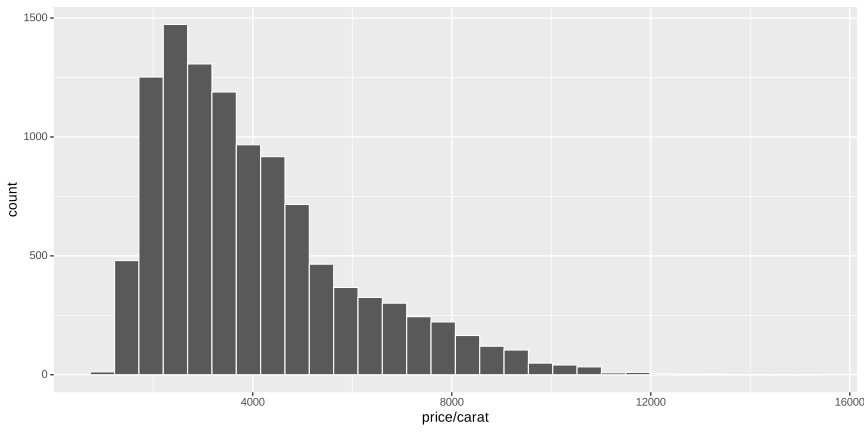

In [ ]:
# Start with the data
diamonds |>
  # Create an empty plot
  ggplot() +
  # Map the `x` axis to price per carat
  aes(x = price / carat) +
  # Visualize as a histogram
  geom_histogram(color = 'white')

We can write the code for the plot above more concisely by moving the `aes` mapping inside the `ggplot()` call. This is the idiomatic way to write `ggplot2` code and we will use it going forward.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


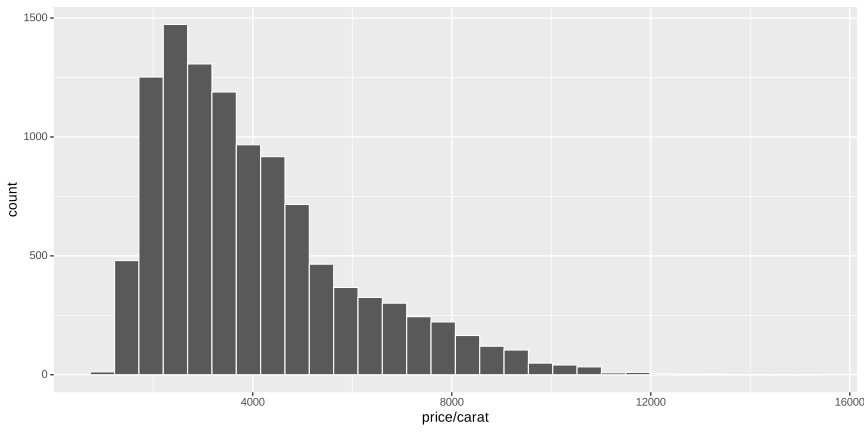

In [ ]:
diamonds |>
  ggplot(aes(x = price / carat)) +
  geom_histogram(color = 'white')

##### Density

An alternative to the histogram is a density plot. We can modify the code used to generate our histogram and swap the `geom_histogram()` function with `geom_density()` to create the density plot.

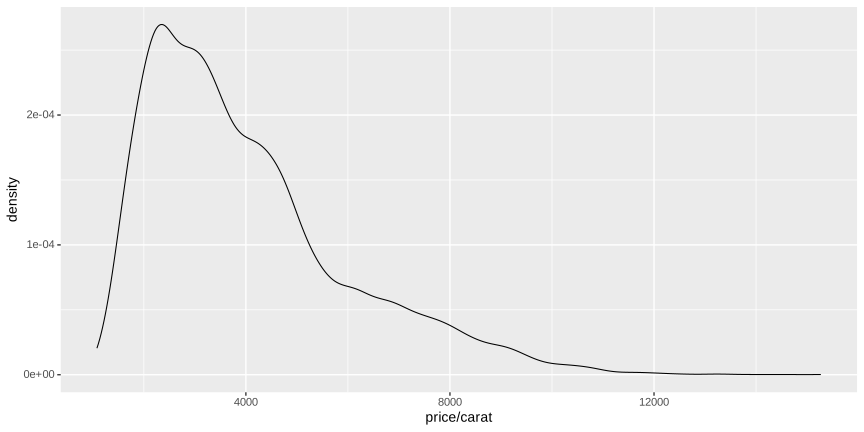

In [ ]:
diamonds |>
  ggplot(aes(x = price / carat)) +
  geom_density()

#### Categorical

A categorical variable usually takes on values from a small set of values. In the `diamonds` dataset, the variables `cut`, `color`, and `clarity` are categorical. The most common way to visualize a categorical variable is by creating a bar plot, where the height of the bars represent the frequency.

We can create a bar plot using `ggplot2` using the `geom_bar()` function. Note that we did not have to explicitly compute and map the `y` variable. This is because, the `geom_bar()` function automatically handles it for us under the hood.

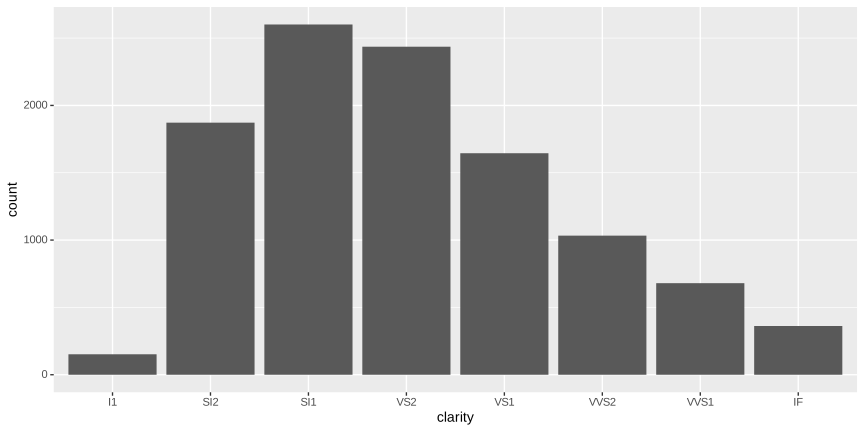

In [ ]:
diamonds |>
  ggplot(aes(x = clarity)) +
  geom_bar()

In the above plot, the diamonds are sorted in alphabetical order based on clarity. But sometimes, it is more useful to order the bars in increasing or decreasing order of frequencies. This can be accomplished using the `fct_infreq()` function from the `forcats` package. It reorders the variable `clarity` in decreasing order of frequencies.

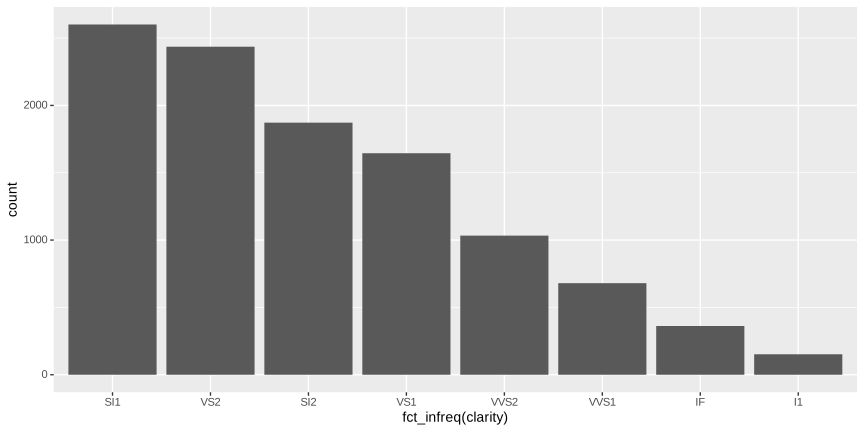

In [ ]:
diamonds |>
  ggplot(aes(x = fct_infreq(clarity))) +
  geom_bar()

At times, it is advantageous to create horizontal bar plots, where the categorical variables are on the `y` axis. Once again, `ggplot2` makes this really easy and all you need to do is to swap out the mapping of the `color` variable from `x` to `y`.

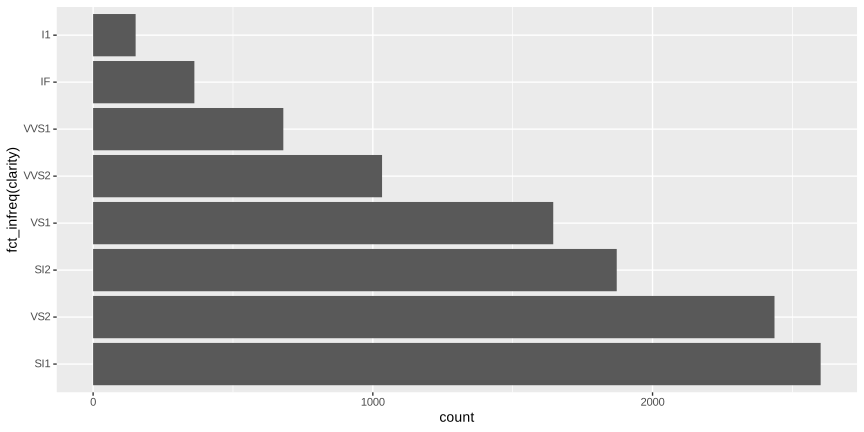

In [ ]:
diamonds |>
  ggplot(aes(y = fct_infreq(clarity))) +
  geom_bar()

### Visualizing Relationships

#### Numerical vs. Numerical

##### Scatterplot

We can visualize the relationship between two numerical variables using a scatterplot. This is accomplished in `ggplot2` by mapping the `x` and `y` aesthetics to the appropriate numerical variables in the data, and visualizing the mapping using `geom_point()`.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price)) +
  geom_point()

As you can see, there is a lot of overplotting going on here that makes it hard to see where the points are concentrated. One way to reduce overplotting is to specify an `alpha` to control the opacity of the points.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price)) +
  geom_point(alpha = 0.1)

##### Hexplot

Hexagonal bin plots, also known as hexbin plots, are a type of visualization used to represent the distribution of two-dimensional data. In these plots, the data is divided into bins which are represented as hexagons on a grid. The color or shading of each hexagon indicates the density of data points within it, where darker colors indicate higher densities. This makes it easy to see where the data is concentrated and where it is more spread out.

We can create a `hexbin` plot by simply swapping out the `geom_point()` function with the `geom_hex()` function.

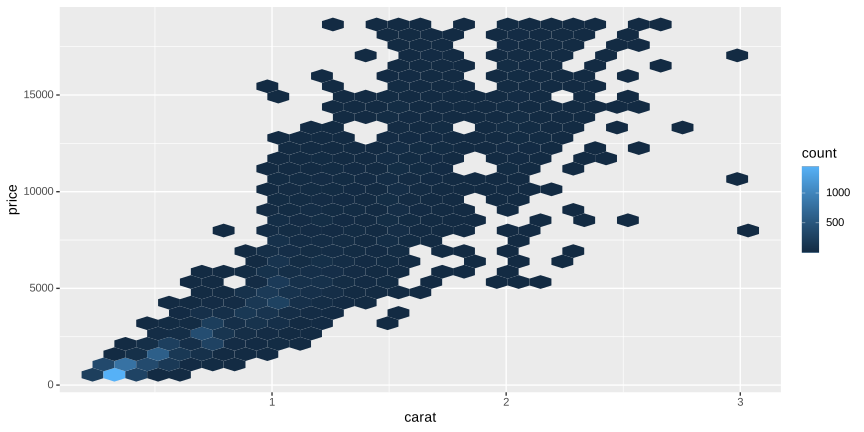

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price)) +
  geom_hex()

#### Categorical vs. Categorical

We can use stacked bar plots to visualize the relationship between two categorical variables. For example, let us take a look at the joint distribution of `clarity` and `color`. This stacked bar plot is the same as a regular bar plot, except that each bar is further subdivided based on the `color` of the diamond. This lets us understand the relationship between the two categorical variables.


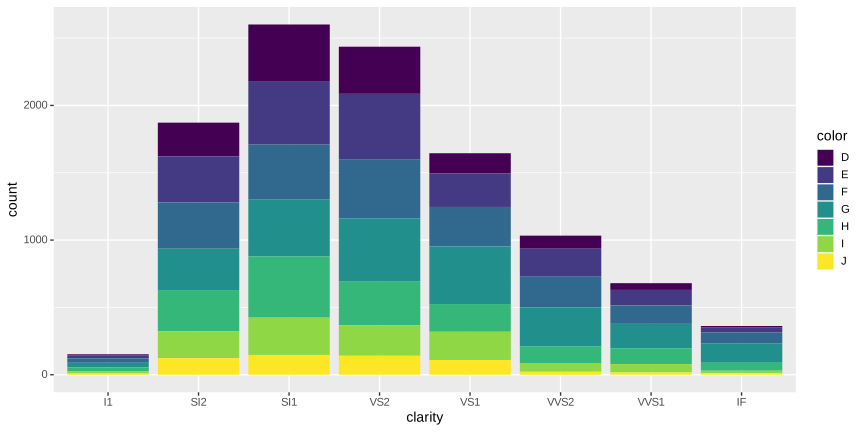

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, fill = color)) +
  geom_bar()

We can set the `position` argument to `fill` to stack all the bars to 100%. This allows us to explore how one categorical variable is distributed with respect to the other.

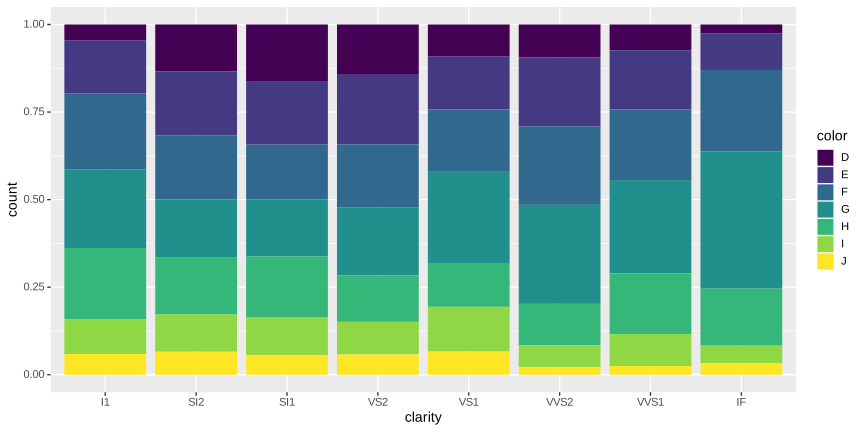

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, fill = color)) +
  geom_bar(position = "fill")

Finally, it is sometimes valuable NOT to stack the bars, but display them side-by-side. We can accomplish this by setting `position` to `dodge`.

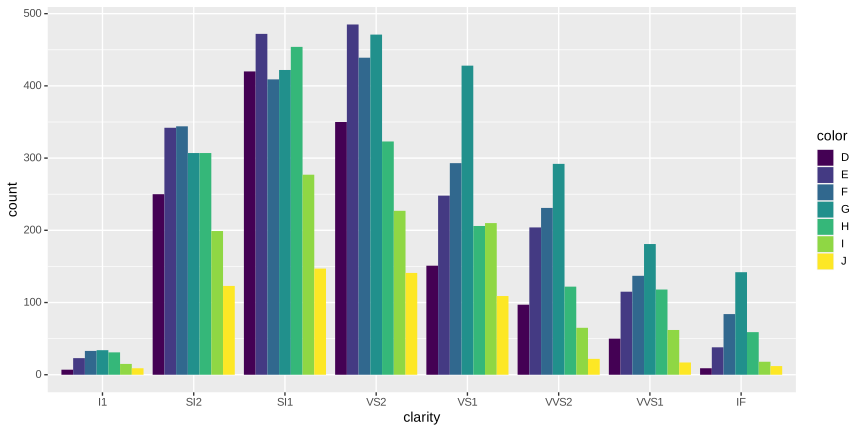

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, fill = color)) +
  geom_bar(position = "dodge")

#### Numerical vs. Categorical

##### Boxplot

We can use a box plot to visualize the relationship between a numerical variable and a categorical variable. For example, let us look at how the `price_per_carat` of a diamond varies with its `clarity`.

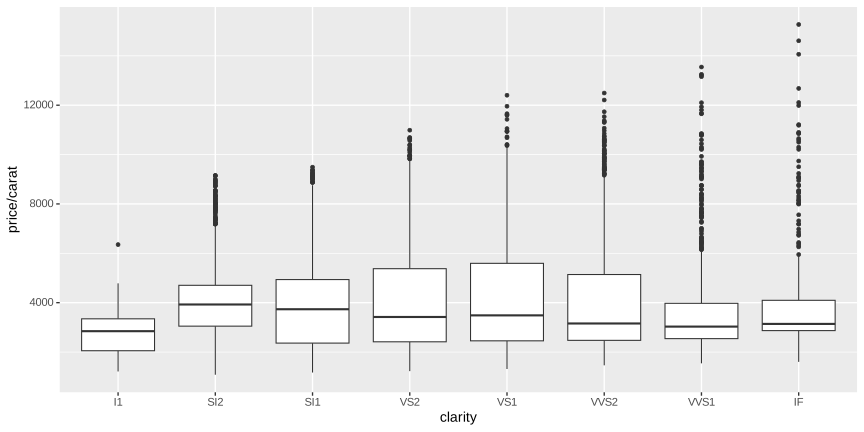

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, y = price / carat)) +
  geom_boxplot()

The box plot summarizes the distribution of `price_per_carat` by `clarity` in terms of its `median` (the thick line in the middle), its 25th and 75th percentiles (the box), and the outlier observations (the points). We can observe from the plot above that the `price_per_carat` increases with `clarity` of the diamond. There is also huge variation in `price_per_carat` for diamonds in the mid range of `clarity`.

We can reduce the overplotting in the outliers by setting the argument `outlier.alpha` in the `geom_boxplot()` call.

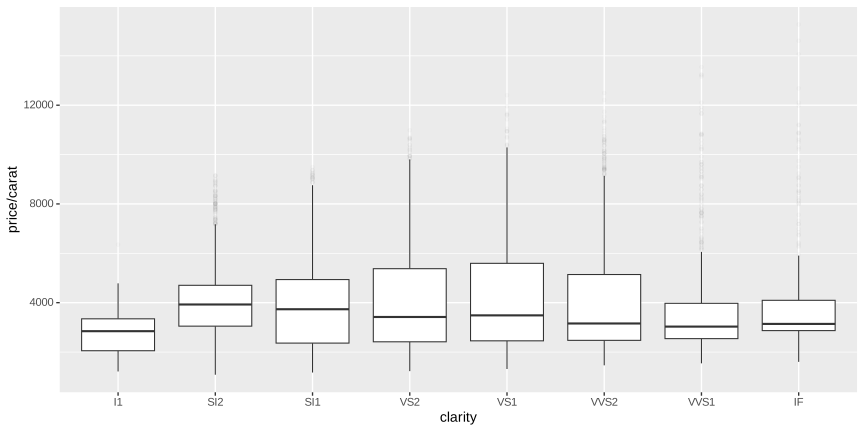

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, y = price / carat)) +
  geom_boxplot(outlier.alpha = 0.02)

##### Violinplot

An interesting alternative to the boxplot is the violin plot.

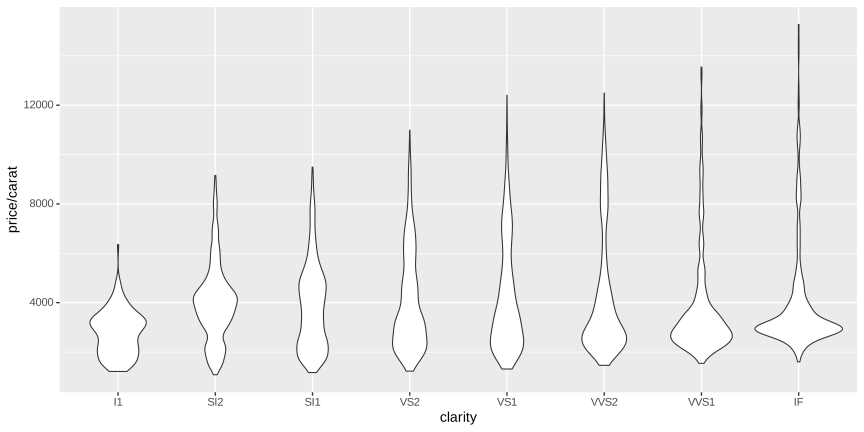

In [ ]:
diamonds |>
  ggplot(aes(x = clarity, y = price / carat)) +
  geom_violin()

#### Multiple Variables

There are two approaches to explore the relationship between multiple variables.

##### Aesthetics

The first is to map the additional variables to other aesthetics. For example, if we want to understand the relationship between `price` and `carat` for diamonds of different `clarity`, we can map `clarity` to the `color` aesthetic.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price, color = clarity)) +
  geom_point()

If we want to visualize variation by `cut` of the diamond as well, we can map an additional aesthetic `shape` to `cut`.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price, color = clarity, shape = cut)) +
  geom_point()

We will learn more about the different `aesthetics` supported by `ggplot2()` in Week 2. While mapping additional aesthetics is a convenient way to bring in additional variables, it can get really messy very soon. Hence, we often resort to another technique to bring in additional variables.

##### Facet

Facets are a really powerful way to visualize the relationship between more than two variables. Rather than mapping the additional variables to `aesthetics`, we split the plot into small multiples or panels. For example, in the plot below, rather than mapping an additional aesthetic for `cut`, we use `facet_wrap()` to split the plot into different panels for each `cut`.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price, color = clarity)) +
  geom_point() +
  facet_wrap(~ cut)

By default, the same scales are used for all panels. You can allow scales to vary across all the panels with the `scales` argument. Free scales make it easier to see patterns within each panel, but harder to compare across panels. The question to ask yourself is: Should scales be fixed (`fixed`, the default), free (`free`), or free in one dimension (`free_x`, `free_y`)?

We are not restricted to splitting the panels based on a single variable. We can split it into a grid based on a combination of variables using the `facet_grid()` function.

In [ ]:
diamonds |>
  ggplot(aes(x = carat, y = price, color = clarity)) +
  geom_point() +
  facet_grid(color ~ cut) +
  theme_gray(base_size = 7)

The `ggplot2` package provides a really powerful abstraction of the grammar of graphics. We will dive deeper into this grammar in Week 2.

<img src="https://i.imgur.com/6fpIXUi.png" />